## Macierz wystąpień

In [1]:
tekst = ["@ayyytylerb that is so true drink lots of coffee",
"RT @bryzy_brib: Senior March tmw morning at 7:25 A.M. in the SENIOR lot. Get up early, make yo coffee/breakfast, cus this will only happen ?",
"If you believe in #gunsense tomorrow would be a very good day to have your coffee any place BUT @Starbucks Guns+Coffee=#nosense @MomsDemand",
"My cute coffee mug. http://t.co/2udvMU6XIG",
"RT @slaredo21: I wish we had Starbucks here... Cause coffee dates in the morning sound perff!",
"Does anyone ever get a cup of coffee before a cocktail??",
"I like my coffee like I like my women...black, bitter, and preferably fair trade. I love #Archer",
"@dreamwwediva ya didn't have coffee did ya?",
"RT @iDougherty42: I just want\r\n some coffee.",
"RT @Dorkv76: I can't care before coffee.",
"No lie I wouldn't mind coming home smelling like coffee",
"RT @JonasWorldFeed: Play Ping Pong with Joe. Take a tour of the stage with Nick. Have coffee with Kevin. Charity auction: https://t.co/VTkK?",
"Have I ever told any of you that Tate Donovan bought my stepmom coffee?",
"RT @JonasWorldFeed: Play Ping Pong with Joe. Take a tour of the stage with Nick. Have coffee with Kevin. Charity auction: https://t.co/VTkK?",
"@HeatherWhaley I was about 2 joke it takes 2 hands to hold hot coffee...then I read headline! #Don'tDrinkNShoot",
"RT @MoveTheSticks: Charlie Whitehurst looks like he should be working \nat a coffee shop in Portland or hosting a renovation show on HGTV.",
"Coffee always makes everything better.",
"RT @AdelaideReview: Food For Thought: @Annabelleats shares a delicious Venison and Porcini Mushroom Pie Recipe. http://t.co/N8O7vqFKWN http?",
"RT @LittleMelss: lmfao!!!@bryanlaca: nahhh Melanie u is fa sho like an ummm a Coffee table ;) ) yeeeee lmaoo",
"I wonder if Christian Colon will get a cup of coffee once the rosters\r expand to 40 man in September. Really nothing to lose by doing so."]

### Przygotowanie tekstu

In [2]:
import re
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

stopwords = ["a", "able", "about", "across", "after", "all", "almost", "also", "am", "among", "an", "and", "any", "are", "as", "at", "be", "because", "been", "but", "by", "can", "cannot", "could", "dear", "did", "do", "does", "either", "else", "ever", "every", "for", "from", "get", "got", "had", "has", "have", "he", "her", "hers", "him", "his", "how", "however", "i", "if", "in", "into", "is", "it", "its", "just", "least", "let", "like", "likely", "may", "me", "might", "most", "must", "my", "neither", "no", "nor", "not", "of", "off", "often", "on", "only", "or", "other", "our", "own", "rather", "said", "say", "says", "she", "should", "since", "so", "some", "than", "that", "the", "their", "them", "then", "there", "these", "they", "this", "tis", "to", "too", "twas", "us", "wants", "was", "we", "were", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "would", "yet", "you", "your"]

def czysc_tekst(tekst):
    
    temp = re.sub("\s{2,}", " ", tekst)
    temp = re.sub("(\r\n|\r|\n)", " ", temp) 
    temp = temp.lower() 
    temp = re.sub("rt", "", temp) 
    temp = re.sub("&amp", "", temp) 
    temp = re.sub("#[a-z,A-Z]*", "", temp)
    temp = re.sub("@\w+", "", temp) 
    temp = re.sub("(f|ht)(tp)([^ ]*)", "", temp) 
    temp = re.sub("http(s?)([^ ]*)", "", temp)
    temp = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", "", temp) 
    temp = re.sub("\d", "", temp) 
    temp = re.sub("\s{2,}", " ", temp) 
    temp = temp.strip()
    return temp

# Czyszczenie i normalizacja
czysty = [czysc_tekst(el) for el in tekst]

# Wyodrębnianie tokenów
tokeny = [re.split("\s", el) for el in czysty]

# usunięcie stopwords
termy = [[t for t in el if t not in stopwords] for el in tokeny]

# Wyodrębnianie rdzeni
termy_stem = [[stemmer.stem(t) for t in el] for el in termy]

In [3]:
termy_all = [term for el in termy_stem for term in el]
unikaty = list(set(termy_all))

print(f'Wszystkich termów jest {len(termy_all)} ale unikatowych jest {len(unikaty)}')
print(unikaty)

Wszystkich termów jest 155 ale unikatowych jest 120
['place', 'ummm', 'stage', 'realli', 'tate', 'mushroom', 'nick', 'home', 'lmfao', 'thought', 'pong', 'host', 'ya', 'earli', 'take', 'hand', 'cus', 'bitter', 'womenblack', 'porcini', 'cute', 'anyon', 'food', 'donovan', 'bought', 'roster', 'noth', 'cant', 'lose', 'man', 'stepmom', 'here', 'work', 'mug', 'up', 'show', 'hgtv', 'believ', 'headlin', 'u', 'lie', 'christian', 'share', 'septemb', 'read', 'melani', 'do', 'veri', 'want', 'look', 'coffeebreakfast', 'tomorrow', 'wish', 'auction', 'hold', 'prefer', 'joke', 'expand', 'happen', 'colon', 'sound', 'trade', 'renov', 'care', 'tdrinknshoot', 'whitehurst', 'yo', 'good', 'everyth', 'poland', 'charli', 'smell', 'tour', 'yeeeee', 'better', 'cup', 'ping', 'pie', 'drink', 'morn', 'tabl', 'lmaoo', 'kevin', 'hot', 'nahhh', 'come', 'venison', 'shop', 'coffe', 'befor', 'tmw', 'sho', 'alway', 'joe', 'didnt', 'onc', 'delici', 'lot', 'fa', 'gunscoffe', 'wonder', 'senior', 'day', 'fair', 'starbuck', 'c

### Macierz dokument-term

In [4]:
import numpy as np

def tworz_dtm(termy_stem, unikaty):    

    macierz = np.zeros((len(termy_stem), len(unikaty)), int)
    
    for doc in range(len(termy_stem)):
        for term in termy_stem[doc]:
            for i, unikat in enumerate(unikaty):
                if unikat == term: 
                    macierz[doc,i] += 1
                    
    return macierz

In [5]:
macierz = np.zeros((len(termy_stem), len(unikaty)), int)
macierz.shape

(20, 120)

In [6]:
dtm = tworz_dtm(termy_stem, unikaty)

In [7]:
dtm.shape

(20, 120)

In [8]:
print(dtm[1,])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1]


In [9]:
unikaty_np = np.array(unikaty)
print(unikaty_np[dtm[1,] > 0])

['earli' 'cus' 'up' 'coffeebreakfast' 'happen' 'yo' 'morn' 'tmw' 'lot'
 'senior' 'march' 'make']


In [10]:
doc_id_np = np.array([f'doc{i}' for i in range(1, len(tekst)+1)])
print(doc_id_np[dtm[:,0] > 0])

['doc3']


### Macierz term-dokument

In [11]:
tdm = np.transpose(dtm)
tdm.shape

(120, 20)

In [12]:
print(tdm[:,1])
unikaty_np = np.array(unikaty)
print(unikaty_np[tdm[:,1] > 0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1]
['earli' 'cus' 'up' 'coffeebreakfast' 'happen' 'yo' 'morn' 'tmw' 'lot'
 'senior' 'march' 'make']


### Wizualizacja

####  rozkład najliczniejszych termów

In [13]:
suma_col=dtm.sum(axis=0)

In [14]:
print(suma_col)
print(suma_col.shape)

[ 1  1  2  1  1  1  2  1  1  1  2  1  2  1  3  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  2  1  1  2  2  1  1  2  1  1  2  1  1  1  1  1 17  2  1  1  1  2  1  1
  1  2  1  1  1  2  1  1  1  1  1  1  1  1  2  1  1  1  1  1  2  1  1  2]
(120,)


In [15]:
bow = list(zip(unikaty, suma_col))
bow.sort(key=lambda el: el[1])
# print(bow[-20:])

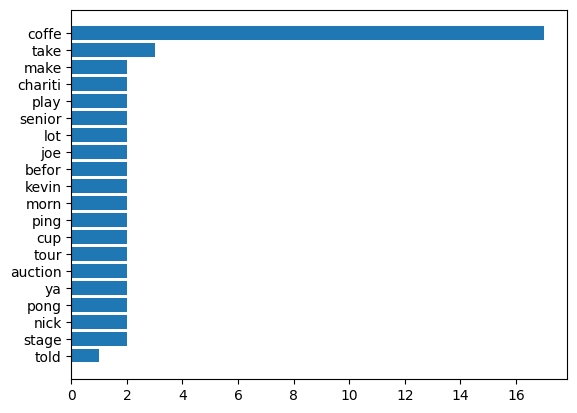

In [16]:
import matplotlib.pyplot as plt

plt.barh(*zip(*bow[-20:]), align='center')
plt.show()

####  liczebność termów w dokumentach

In [17]:
suma_row=dtm.sum(axis=1)

In [18]:
print(suma_row)
print(suma_row.shape)

[ 4 13  8  3  9  5  7  4  2  4  7 12  6 12  9 11  5  9 11 14]
(20,)


In [19]:
dok_licz = list(zip(doc_id_np, suma_row))
dok_licz.sort(key=lambda el: el[1])

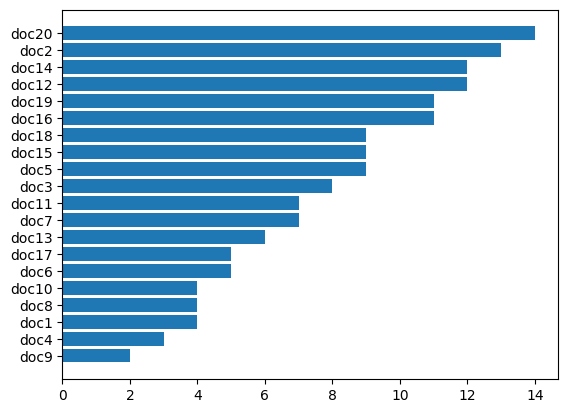

In [20]:
# import matplotlib.pyplot as plt

dok, licz = zip(*dok_licz)
plt.barh(dok,licz, align='center')
plt.show()